In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_loc = '/Users/simon/Documents/DTU/9. semester/deep learning/data'

measurements_all = [pd.read_csv(os.path.join(data_loc, f'Case{case}',f'Proj_Measurements_Case{case}.csv')) for case in (1,2,3)]
nwp_all = [pd.read_csv(os.path.join(data_loc, f'Case{case}',f'Proj_NWP_Case{case}.csv')) for case in (1,2,3)]

day = 0
competitions = [pd.read_csv(os.path.join(data_loc, 'competition','original', f'Day{day}NWP_C{case}.csv')) for case in (1,2,3)]

power_curves = [pd.read_csv(os.path.join(data_loc, f'Case{case}', 'Turbine_Info', 'Power_Curve.txt'), sep=(' ' if case != 3 else '\t'), header=0, index_col=0) for case in (1,2,3)]

df_all = measurements_all+nwp_all+competitions

for i in range(3):
    measurements_all[i].name = f'Measurement {i+1}'
    nwp_all[i].name = f'NWP {i+1}'
    competitions[i].name = f'Competition_case_{i+1}_day_{day}'
    
    power_curves[i].rename(columns={power_curves[i].columns[0] : 'curve'}, inplace = True)
power_curves[2].index.name = None

    
for df in df_all:
    for name in df.columns:
        if name != 'Date_Time':
            df[name]=df[name].astype('float64')
        else:
            df['Date_Time'] = pd.to_datetime(df['Date_Time'])

In [3]:
for df in df_all:
    print('\n\nDataframe: ',df.name)
    print(f'Number of rows: {len(df.index)}. Memory usage: {df.memory_usage().sum()/1048576:.2f} MB.')
    print('\nMinimum time difference:', df['Date_Time'].diff().min())
    print('Maximum time difference:', df['Date_Time'].diff().max())
    print(f'Start time: {df["Date_Time"].min()}. End time: {df["Date_Time"].max()}. \nTotal time difference: {df["Date_Time"].max()-df["Date_Time"].min()}')
    
    summary=pd.concat((df.dtypes, df.isna().sum(), df.describe(datetime_is_numeric=True).transpose()), axis=1)
    summary.rename({0: 'Dtype', 1: 'Null count'}, axis=1, inplace=True)
    summary.loc['Date_Time','mean']=summary.loc['Date_Time','mean'].round('min')
    
    display(summary)

    





Dataframe:  Measurement 1
Number of rows: 147205. Memory usage: 13.48 MB.

Minimum time difference: 0 days 00:15:00
Maximum time difference: 0 days 00:15:00
Start time: 2017-01-07 20:15:00. End time: 2021-03-21 05:15:00. 
Total time difference: 1533 days 09:00:00


,Dtype,Null count,count,mean,min,25%,50%,75%,max,std
Date_Time,datetime64[ns],0,147205,2019-02-13 12:45:00,2017-01-07 20:15:00,2018-01-26 04:30:00,2019-02-13 12:45:00,2020-03-02 21:00:00,2021-03-21 05:15:00,NaN
Speed_10m,float64,475,146730.0,3.223092,0.0,0.067,1.6,5.2,23.967,3.951957
Direction_10m,float64,475,146730.0,197.287962,0.0,170.0,217.4,246.0,360.0,79.243239
Speed_30m,float64,475,146730.0,6.542762,0.0,3.667,5.667,8.667,27.167,3.906181
Direction_30m,float64,475,146730.0,201.393653,0.0,167.8,230.0,248.6,360.0,79.225843
Speed_65m,float64,475,146730.0,5.442744,0.0,0.767,4.9,8.467,32.167,4.709219
Direction_65m,float64,475,146730.0,203.584827,0.0,163.6,226.3,254.9,360.0,83.881323
Speed_70m,float64,475,146730.0,7.031156,0.0,3.967,6.433,9.5,28.4,4.188691
Direction_70m,float64,475,146730.0,188.332053,0.0,149.9,203.0,225.7,360.0,75.969289
Speed_80m,float64,107433,39772.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




Dataframe:  Measurement 2
Number of rows: 174927. Memory usage: 13.35 MB.

Minimum time difference: 0 days 00:15:00
Maximum time difference: 0 days 00:15:00
Start time: 2016-01-01 00:00:00. End time: 2020-12-27 03:30:00. 
Total time difference: 1822 days 03:30:00


,Dtype,Null count,count,mean,min,25%,50%,75%,max,std
Date_Time,datetime64[ns],0,174927,2018-06-30 01:45:00,2016-01-01 00:00:00,2017-03-31 12:52:30,2018-06-30 01:45:00,2019-09-28 14:37:30,2020-12-27 03:30:00,NaN
Speed_10m,float64,7524,167403.0,2.250325,0.0,0.533,1.926,3.346,15.6,2.00614
Direction_10m,float64,7524,167403.0,209.632154,0.0,158.6,206.3,273.3,360.0,79.32224
Speed_30m,float64,7524,167403.0,4.591542,0.0,2.595,4.065,6.065,22.133,2.900411
Direction_30m,float64,7524,167403.0,208.216658,0.0,155.1,216.5,271.1,359.9,77.893663
Speed_65m,float64,7524,167403.0,5.568522,0.0,3.277,5.1,7.411,25.0,3.275695
Direction_65m,float64,7524,167403.0,208.06772,0.0,166.9,211.8,271.2,360.0,77.638411
Speed_70m,float64,10500,164427.0,5.246556,0.0,2.733,4.873,7.391,24.033,3.599624
Direction_70m,float64,10500,164427.0,198.196066,0.0,145.1,206.1,275.2,360.0,95.621154
Park Power [KW],float64,2482,172445.0,22322.760486,-49.0,1190.0,10658.0,34639.0,100671.0,26846.601053




Dataframe:  Measurement 3
Number of rows: 118382. Memory usage: 9.03 MB.

Minimum time difference: 0 days 00:15:00
Maximum time difference: 0 days 00:15:00
Start time: 2017-05-01 00:00:00. End time: 2020-09-15 03:15:00. 
Total time difference: 1233 days 03:15:00


,Dtype,Null count,count,mean,min,25%,50%,75%,max,std
Date_Time,datetime64[ns],0,118382,2019-01-07 13:38:00,2017-05-01 00:00:00,2018-03-05 06:48:45,2019-01-07 13:37:30,2019-11-11 20:26:15,2020-09-15 03:15:00,NaN
Speed_10m,float64,1516,116866.0,4.958773,0.0,3.199,4.556,6.362,21.1,2.577617
Direction_10m,float64,1516,116866.0,191.15623,0.0,146.6,207.1,240.0,360.0,82.724207
Speed_30m,float64,1516,116866.0,1.807336,0.0,0.0,0.0,3.615,18.68,2.863969
Direction_30m,float64,1516,116866.0,48.317606,0.0,0.0,0.0,111.8,359.5,76.04896
Speed_50m,float64,1516,116866.0,5.446259,0.0,3.486,5.148,7.074,21.017,2.775895
Direction_50m,float64,1516,116866.0,189.712171,0.0,112.8,211.2,261.1,360.0,94.016598
Speed_80m,float64,1516,116866.0,5.755528,0.0,3.485,5.564,7.808,21.797,3.209452
Direction_80m,float64,1516,116866.0,198.342824,0.0,162.8,215.6,254.3,360.0,87.810076
Park Power [KW],float64,1248,117134.0,11350.979895,0.0,1321.0,7042.5,17611.0,49789.0,12158.275204




Dataframe:  NWP 1
Number of rows: 181670. Memory usage: 24.95 MB.

Minimum time difference: 0 days 00:15:00
Maximum time difference: 2 days 00:15:00
Start time: 2016-01-01 20:00:00. End time: 2021-03-21 05:15:00. 
Total time difference: 1905 days 09:15:00


,Dtype,Null count,count,mean,min,25%,50%,75%,max,std
Date_Time,datetime64[ns],0,181670,2018-08-09 21:02:00,2016-01-01 20:00:00,2017-04-18 22:18:45,2018-08-08 00:37:30,2019-12-01 02:56:15,2021-03-21 05:15:00,NaN
Direction_10m,float64,0,181670.0,216.240397,0.0,179.0,249.0,266.0,359.0,79.309326
Speed_10m,float64,0,181670.0,3.737155,0.0,2.35,3.44,4.89,13.1,1.84244
Temperature_10m,float64,0,181670.0,4.153529,-31.2,-8.97,5.51,17.0,34.2,14.532573
Pressure_seaLevel,float64,0,181670.0,993.21994,962.5,986.94,993.1,999.67,1017.19,8.478844
Air Density_10m,float64,0,181670.0,1.252281,1.112,1.186,1.242,1.318,1.451,0.074078
Direction_50m,float64,0,181670.0,214.380277,0.0,178.0,246.0,265.0,359.0,78.983828
Speed_50m,float64,0,181670.0,3.092342,0.0,1.88,2.74,4.05,11.4,1.600076
Temperature_50m,float64,0,181670.0,4.153529,-31.2,-8.97,5.51,17.0,34.2,14.532573
Air Density_50m,float64,0,181670.0,1.252281,1.112,1.186,1.242,1.318,1.451,0.074078




Dataframe:  NWP 2
Number of rows: 173695. Memory usage: 23.85 MB.

Minimum time difference: 0 days 00:15:00
Maximum time difference: 2 days 00:15:00
Start time: 2016-01-01 20:00:00. End time: 2020-12-27 03:30:00. 
Total time difference: 1821 days 07:30:00


,Dtype,Null count,count,mean,min,25%,50%,75%,max,std
Date_Time,datetime64[ns],0,173695,2018-06-28 23:34:00,2016-01-01 20:00:00,2017-03-29 03:52:30,2018-06-27 11:45:00,2019-09-29 19:37:30,2020-12-27 03:30:00,NaN
Direction_10m,float64,0,173695.0,215.937436,0.0,136.0,256.0,281.0,359.0,87.387956
Speed_10m,float64,0,173695.0,3.376196,0.0,2.06,3.02,4.45,14.8,1.772969
Temperature_10m,float64,0,173695.0,4.953279,-32.7,-7.6,6.57,17.49,33.9,14.278703
Pressure_seaLevel,float64,0,173695.0,995.898775,964.6,989.59,995.65,1002.375,1020.18,8.51454
Air Density_10m,float64,0,173695.0,1.251909,1.118,1.188,1.24,1.314,1.453,0.072934
Direction_50m,float64,0,173695.0,213.530816,0.0,131.0,255.0,281.0,359.0,88.903334
Speed_50m,float64,0,173695.0,2.826745,0.0,1.66,2.45,3.72,13.0,1.550585
Temperature_50m,float64,0,173695.0,4.953279,-32.7,-7.6,6.57,17.49,33.9,14.278703
Air Density_50m,float64,0,173695.0,1.251909,1.118,1.188,1.24,1.314,1.453,0.072934




Dataframe:  NWP 3
Number of rows: 164094. Memory usage: 22.54 MB.

Minimum time difference: 0 days 00:15:00
Maximum time difference: 2 days 00:15:00
Start time: 2016-01-01 20:00:00. End time: 2020-09-15 03:15:00. 
Total time difference: 1718 days 07:15:00


,Dtype,Null count,count,mean,min,25%,50%,75%,max,std
Date_Time,datetime64[ns],0,164094,2018-05-09 06:18:00,2016-01-01 20:00:00,2017-03-04 03:48:45,2018-05-07 11:37:30,2019-07-15 19:26:15,2020-09-15 03:15:00,NaN
Direction_10m,float64,0,164094.0,196.231282,0.0,144.0,207.0,256.0,359.0,89.052316
Speed_10m,float64,0,164094.0,3.038068,0.0,2.0,2.7,3.84,11.0,1.494551
Temperature_10m,float64,0,164094.0,8.282799,-25.8,-2.99,9.73,20.13,35.8,13.600326
Pressure_seaLevel,float64,0,164094.0,995.034221,962.0,987.45,994.63,1002.28,1021.4,9.191981
Air Density_10m,float64,0,164094.0,1.235723,1.109,1.174,1.225,1.292,1.432,0.070183
Direction_50m,float64,0,164094.0,192.627287,0.0,131.0,205.0,252.0,359.0,88.779898
Speed_50m,float64,0,164094.0,2.507836,0.1,1.6,2.14,3.16,9.7,1.284403
Temperature_50m,float64,0,164094.0,8.282799,-25.8,-2.99,9.73,20.13,35.8,13.600326
Air Density_50m,float64,0,164094.0,1.235723,1.109,1.174,1.225,1.292,1.432,0.070183




Dataframe:  Competition_case_1_day_0
Number of rows: 171. Memory usage: 0.02 MB.

Minimum time difference: 0 days 00:15:00
Maximum time difference: 0 days 00:15:00
Start time: 2021-03-21 05:15:00. End time: 2021-03-22 23:45:00. 
Total time difference: 1 days 18:30:00


,Dtype,Null count,count,mean,min,25%,50%,75%,max,std
Date_Time,datetime64[ns],0,171,2021-03-22 02:30:00,2021-03-21 05:15:00,2021-03-21 15:52:30,2021-03-22 02:30:00,2021-03-22 13:07:30,2021-03-22 23:45:00,NaN
Direction_10m,float64,0,171.0,263.666667,133.0,251.0,265.0,283.5,322.0,36.309454
Speed_10m,float64,0,171.0,4.508889,1.1,4.18,4.77,5.3,5.8,1.12279
Temperature_10m,float64,0,171.0,-1.157135,-6.6,-2.485,-0.6,0.385,3.0,2.515224
Pressure_seaLevel,float64,0,171.0,984.16883,980.8,981.785,984.46,985.965,987.2,2.10938
Air Density_10m,float64,0,171.0,1.26117,1.242,1.251,1.257,1.2695,1.289,0.013139
Direction_50m,float64,0,171.0,259.789474,120.0,249.0,262.0,278.0,319.0,38.960041
Speed_50m,float64,0,171.0,3.571754,0.7,3.235,3.87,4.3,4.4,0.944823
Temperature_50m,float64,0,171.0,-1.157135,-6.6,-2.485,-0.6,0.385,3.0,2.515224
Air Density_50m,float64,0,171.0,1.26117,1.242,1.251,1.257,1.2695,1.289,0.013139




Dataframe:  Competition_case_2_day_0
Number of rows: 178. Memory usage: 0.02 MB.

Minimum time difference: 0 days 00:15:00
Maximum time difference: 0 days 00:15:00
Start time: 2020-12-27 03:30:00. End time: 2020-12-28 23:45:00. 
Total time difference: 1 days 20:15:00


,Dtype,Null count,count,mean,min,25%,50%,75%,max,std
Date_Time,datetime64[ns],0,178,2020-12-28 01:38:00,2020-12-27 03:30:00,2020-12-27 14:33:45,2020-12-28 01:37:30,2020-12-28 12:41:15,2020-12-28 23:45:00,NaN
Direction_10m,float64,0,178.0,231.679775,0.0,100.0,296.0,311.0,359.0,118.917641
Speed_10m,float64,0,178.0,1.723371,0.4,1.0925,1.6,1.79,4.32,0.889077
Temperature_10m,float64,0,178.0,-16.677584,-20.3,-18.4775,-17.365,-15.0225,-11.7,2.449307
Pressure_seaLevel,float64,0,178.0,1008.282247,1005.0,1005.845,1009.09,1010.2775,1011.3,2.141535
Air Density_10m,float64,0,178.0,1.370483,1.34,1.363,1.3725,1.381,1.394,0.014776
Direction_50m,float64,0,178.0,233.994382,1.0,93.0,292.0,329.25,359.0,118.690477
Speed_50m,float64,0,178.0,1.47691,0.8,0.9125,1.4,1.59,3.45,0.657973
Temperature_50m,float64,0,178.0,-16.677584,-20.3,-18.4775,-17.365,-15.0225,-11.7,2.449307
Air Density_50m,float64,0,178.0,1.370483,1.34,1.363,1.3725,1.381,1.394,0.014776




Dataframe:  Competition_case_3_day_0
Number of rows: 179. Memory usage: 0.02 MB.

Minimum time difference: 0 days 00:15:00
Maximum time difference: 0 days 00:15:00
Start time: 2020-09-15 03:15:00. End time: 2020-09-16 23:45:00. 
Total time difference: 1 days 20:30:00


,Dtype,Null count,count,mean,min,25%,50%,75%,max,std
Date_Time,datetime64[ns],0,179,2020-09-16 01:30:00,2020-09-15 03:15:00,2020-09-15 14:22:30,2020-09-16 01:30:00,2020-09-16 12:37:30,2020-09-16 23:45:00,NaN
Direction_10m,float64,0,179.0,173.458101,91.0,131.0,169.0,224.0,287.0,52.496144
Speed_10m,float64,0,179.0,3.806872,1.0,2.045,3.59,5.07,8.1,1.980865
Temperature_10m,float64,0,179.0,18.478101,13.9,16.64,17.65,20.41,23.1,2.437975
Pressure_seaLevel,float64,0,179.0,985.944749,980.7,981.77,983.95,989.95,993.61,4.588518
Air Density_10m,float64,0,179.0,1.17852,1.163,1.169,1.18,1.183,1.206,0.01069
Direction_50m,float64,0,179.0,169.871508,79.0,121.5,167.0,224.0,291.0,56.495204
Speed_50m,float64,0,179.0,3.096369,0.9,1.605,2.94,4.205,6.6,1.615082
Temperature_50m,float64,0,179.0,18.478101,13.9,16.64,17.65,20.41,23.1,2.437975
Air Density_50m,float64,0,179.0,1.17852,1.163,1.169,1.18,1.183,1.206,0.01069


NWP has no missing values (except for park power in case3), but the time points are not uniformly distributed.


Measurement has missing values for all variables except for the date_time, so we know that the time stamps are all evenly distributed with 15 minutes steps.


Idea for NN: Include date in year as number e.g. 1-365 as a way to include the seasons? Perhaps somethig that can be cyclical without discontinuitites at 365 to 1 transition. Use sin and cos. Same for wind direction.

We should probably disregard speed and direction at 80m for measurement 1 - all zeros.

can we use nwp from future? No.

subtract mean and divide by sd?

wind speed: maybe just divide by std and not subtract mean in order to still have only positive values?

nwp is our features, and is power output is our target. Use actual measurements for checking quality of nwp.

One NN to predict for all 3? or one for each case? Start with one nn and one case, best to end with one nn for all cases.

clip prediction at capacity?

k fold cv

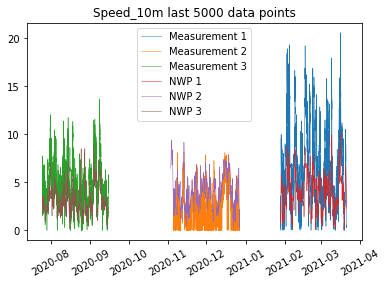

In [4]:
col = 'Speed_10m'
for i in range(6):
    
    df = df_all[i]
    
    plt.plot(df[-5000:]['Date_Time'],df[-5000:][col],linewidth=0.5, label=df.name)
    
    
plt.title(col+' last 5000 data points')
plt.legend()
plt.xticks(rotation=30)
plt.show()

In [5]:
df_all_new=[]

interpolate=False

for i in range(len(df_all)):
    df = df_all[i]
    name=df.name
    df = df.copy(deep=True)
    

    
    df = df.resample('15min', on='Date_Time').mean().reset_index()
    
    if interpolate:
        # Sets all na values to 0.
        #df = df.iloc[:,1:].fillna(0) 
        # Sets all na value to the previous value
        #df = df.iloc[:,1:].interpolate(method ='pad', limit_direction ='forward') 
        # Sets all na value to the previous value
        #df = df.iloc[:,1:].interpolate(method ='pad', limit_direction ='backward') 
        # Remove rows containing na
        #df = df.iloc[:,1:].dropna() 
        # interpolation. Assumes equidistant data.
        # (consecutive nans are filled from both directions because measurement 1 has na in park power for the first 10 rows)
        # First quadratic to get better fits, then linear because quadratic does not fill if ends of data is nan.
        df.iloc[:,1:] = df.iloc[:,1:].interpolate(method ='quadratic', limit_direction='both') 
        df.iloc[:,1:] = df.iloc[:,1:].interpolate(method ='linear', limit_direction='both') 
        assert df.isna().sum().sum()==0


        # Because quadratic interpolation can give values outside accepted range
        for label in df.columns:
            if 'speed' in label.lower():
                df[label].clip(lower=0,inplace=True)
            elif 'direction' in label.lower():
                df[label].clip(lower=0,upper=360,inplace=True)

    if i==0:
        df.drop(columns=['Speed_80m','Direction_80m'], inplace=True)
        
    #df.dropna(inplace=True)
    df.name=name
    df_all_new.append(df)

    if i>=3: 
        #Check that data is unchanged before and after new time points are inserted
        df=df_all[i]
        df_new=df_all_new[i]
        idx = df['Date_Time'].diff().ne(pd.to_timedelta(15,unit='m'))[1:].idxmax()
        idx_new = df_new.eq(df.iloc[idx,:]).sum(axis=1).idxmax()

        assert df[idx-100:idx].equals(df_new[idx-100:idx])
        assert df[idx:idx+100].reset_index(drop=True).equals(df_new[idx_new:idx_new+100].reset_index(drop=True)) 
        

In [6]:
if interpolate:
    df=df_all[3]
    df_new=df_all_new[3]

    idx = df['Date_Time'].diff().ne(pd.to_timedelta(15,unit='m'))[1:].idxmax()
    idx_new = df_new.eq(df.iloc[idx,:]).sum(axis=1).idxmax()

    col = 'Speed_10m'
    plt.plot(df[idx-100:idx+100]['Date_Time'], df[idx-100:idx+100][col],'x')
    plt.plot(df_new[idx-100:idx_new+100]['Date_Time'], df_new[idx-100:idx_new+100][col],'.',markersize=3)
    plt.xticks(rotation=30)
    plt.title('Larger time delta than 15 min, new points inserted and interpolated')
    plt.plot()


    df=df_all[0]
    df_new=df_all_new[0]

    idx = df[col][50:].isna().idxmax()
    idx_new = df[col][idx:].isna().idxmin()

    plt.figure()
    plt.plot(df[idx-100:idx_new+100]['Date_Time'], df[idx-100:idx_new+100][col],'x')
    plt.plot(df_new[idx-100:idx_new+100]['Date_Time'], df_new[idx-100:idx_new+100][col],'.',markersize=3)
    plt.xticks(rotation=30)
    plt.title("NaN's filled with quadratically interpolated data")
    plt.plot()

    col = 'Park Power [KW]'
    plt.figure()
    plt.plot(df[:100]['Date_Time'], df[:100][col],'x')
    plt.plot(df_new[:100]['Date_Time'], df_new[:100][col],'.',markersize=3)
    plt.xticks(rotation=30)
    plt.title("NaN's filled with linearly interpolated data (at the end)")
    plt.plot()


In [7]:
#Remove outliers
z_lim=3
outliers=[]
df_no_outliers=[]
for i in range(6):
    df=df_all_new[i]
    name=df.name
    z_scores = (df.iloc[:,1:]-df.iloc[:,1:].mean())/df.iloc[:,1:].std()
    outliers.append(df[(z_scores.abs()>=z_lim)])
    df_no_outliers.append(df[(z_scores.abs()<z_lim)])
    outliers[-1]['Date_Time']=df['Date_Time']
    df_no_outliers[-1]['Date_Time']=df['Date_Time']
    outliers[i].name=name
    df_no_outliers[i].name=name

"""
#Remove outliers
z_lim=3
outliers=[]
df_no_outliers=[]
for i in range(6):
    df=df_all_new[i]
    name=df.name
    z_scores = (df.iloc[:,1:]-df.iloc[:,1:].mean())/df.iloc[:,1:].std()
    outliers.append(df[(z_scores.abs()>=z_lim)])
    outliers[-1]['Date_Time']=df['Date_Time']
    df_new = df.copy()
    df_new[(z_scores.abs()>=z_lim).any(axis=1)]=np.nan
    df_no_outliers.append(df_new)
    outliers[i].name=name
    df_no_outliers[i].name=name
"""

"\n#Remove outliers\nz_lim=3\noutliers=[]\ndf_no_outliers=[]\nfor i in range(6):\n    df=df_all_new[i]\n    name=df.name\n    z_scores = (df.iloc[:,1:]-df.iloc[:,1:].mean())/df.iloc[:,1:].std()\n    outliers.append(df[(z_scores.abs()>=z_lim)])\n    outliers[-1]['Date_Time']=df['Date_Time']\n    df_new = df.copy()\n    df_new[(z_scores.abs()>=z_lim).any(axis=1)]=np.nan\n    df_no_outliers.append(df_new)\n    outliers[i].name=name\n    df_no_outliers[i].name=name\n"

In [8]:
do_plots=False
for i in range(3,6):
    out=outliers[i]
    df=df_no_outliers[i]
    
    for col_name in df.columns:
        if col_name != 'Date_Time' and do_plots:
            plt.figure()
            plt.plot(df['Date_Time'], df[col_name], '.', markersize=0.5, label=col_name)
            plt.plot(out['Date_Time'], out[col_name], '.', markersize=0.5, label='Outlier')
            
            plt.title(df.name)
            plt.legend()
            plt.show()

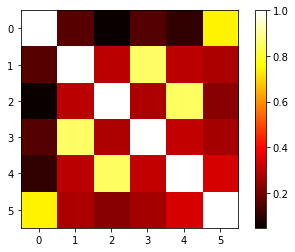

Direction_50m      Direction_100m      0.852440
Speed_50m          Speed_100m          0.849919
Pressure_seaLevel  Air Density_150m    0.741635
Speed_100m         Air Density_150m    0.338793
Direction_100m     Speed_100m          0.307365
Direction_50m      Speed_100m          0.297084
                   Speed_50m           0.296422
Speed_50m          Direction_100m      0.277590
Direction_50m      Air Density_150m    0.273674
Direction_100m     Air Density_150m    0.265874
dtype: float64


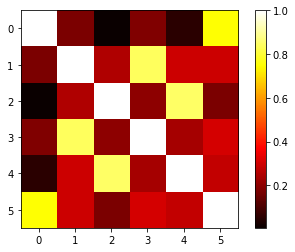

Speed_50m          Speed_100m          0.846577
Direction_50m      Direction_100m      0.838389
Pressure_seaLevel  Air Density_150m    0.748589
Direction_100m     Air Density_150m    0.306790
Direction_50m      Air Density_150m    0.295584
                   Speed_100m          0.295334
Speed_100m         Air Density_150m    0.278968
Direction_50m      Speed_50m           0.252865
Direction_100m     Speed_100m          0.238211
Speed_50m          Direction_100m      0.200630
dtype: float64


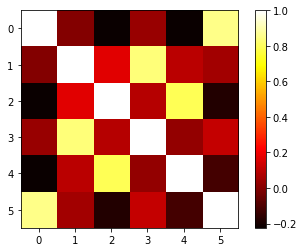

Pressure_seaLevel  Air Density_150m    0.852992
Direction_50m      Direction_100m      0.835873
Speed_50m          Speed_100m          0.793778
Pressure_seaLevel  Speed_100m          0.224190
                   Speed_50m           0.219490
Speed_50m          Air Density_150m    0.179043
Direction_50m      Speed_50m           0.172493
Direction_100m     Air Density_150m    0.117070
Speed_100m         Air Density_150m    0.115778
Direction_50m      Speed_100m          0.098425
dtype: float64


In [9]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr


for i, df in enumerate(df_no_outliers[3:]):
    top_cors = get_top_abs_correlations(df[df.columns[1:]])
    while top_cors[0] == 1:
        drop_col = list(top_cors[0:1].iteritems())[0][0][0]
        df.drop(columns = drop_col, inplace=True)
        df_all_new[6+i].drop(columns = drop_col, inplace=True)
        top_cors = get_top_abs_correlations(df[df.columns[1:]])
    
    df.drop(columns = 'Temperature_150m', inplace = True) # correlation above 0.993 in all cases
    df_all_new[6+i].drop(columns = 'Temperature_150m', inplace = True)
    
    # Case 1+2: hub height 65m, blade length 38.5m. 
    # Case 3  : hub height 80m, blade length 43m
    df.drop(columns = 'Direction_10m', inplace = True) # correlation above 0.97 in all cases
    df.drop(columns = 'Direction_150m', inplace = True) # correlation above 0.97 in all cases
    df.drop(columns = 'Speed_10m', inplace = True) # correlation above 0.93 with 50m in all cases
    df.drop(columns = 'Speed_150m', inplace = True) # correlation above 0.93 with 100m in all cases
    df_all_new[6+i].drop(columns = 'Direction_10m', inplace = True)
    df_all_new[6+i].drop(columns = 'Direction_150m', inplace = True)
    df_all_new[6+i].drop(columns = 'Speed_10m', inplace = True)
    df_all_new[6+i].drop(columns = 'Speed_150m', inplace = True)
    # Do pca instead of removing all four
    
    top_cors = get_top_abs_correlations(df[df.columns[1:]])
    corr = df[df.columns[1:]].corr()
    plt.imshow(corr, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()
    
    print(top_cors[:10])

    

In [10]:

for i, df in enumerate(df_no_outliers[3:]):
    for col in df.columns:
        if 'speed' in col.lower():
            if '_cubed' not in col.lower():
                df[col+'_cubed'] = df[col]**3
                df_all_new[6+i][col+'_cubed'] = df[col]**3
            if '_power_curve' not in col.lower():
                indexes_for_curve = power_curves[i].index[np.abs(power_curves[i].index.values[:, None]-df[col].values).argmin(axis=0)]
                df[col+'_power_curve'] = power_curves[i]['curve'][indexes_for_curve].reset_index(drop=True)
                
                indexes_for_curve = power_curves[i].index[np.abs(power_curves[i].index.values[:, None]-df_all_new[6+i][col].values).argmin(axis=0)]
                df_all_new[6+i][col+'_power_curve'] = power_curves[i]['curve'][indexes_for_curve].reset_index(drop=True)
        



In [11]:
for i,df in enumerate(df_no_outliers[3:]):
    for col_name in df.columns:
        if col_name == 'Date_Time':
            continue
        elif 'direction' in col_name.lower():
            df.loc[:,col_name+'_cos']=np.cos(df.loc[:,col_name]*2*np.pi/360)
            df.loc[:,col_name+'_sin']=np.sin(df.loc[:,col_name]*2*np.pi/360)
            df.drop(columns=[col_name],inplace=True)
            
            df_all_new[6+i].loc[:,col_name+'_cos']=np.cos(df_all_new[6+i].loc[:,col_name]*2*np.pi/360)
            df_all_new[6+i].loc[:,col_name+'_sin']=np.sin(df_all_new[6+i].loc[:,col_name]*2*np.pi/360)
            df_all_new[6+i].drop(columns=[col_name],inplace=True)
        else:
            df.loc[:,col_name] = (df.loc[:,col_name]-df.loc[:,col_name].mean())/df.loc[:,col_name].std()
            df_all_new[6+i].loc[:,col_name] = (df_all_new[6+i].loc[:,col_name]-df_all_new[6+i].loc[:,col_name].mean())/df_all_new[6+i].loc[:,col_name].std()

cap = {1: 49500, 2: 99000, 3: 49500}
for i, df in enumerate(df_no_outliers[:3]):
    df['Park Power [KW]'] = df['Park Power [KW]']/cap[i+1]

In [12]:
for df in df_no_outliers[3:]:
    year_radians = df['Date_Time'].dt.dayofyear*np.pi*2/365.25
    df.loc[:,'season_cos']=np.cos(year_radians)
    df.loc[:,'season_sin']=np.sin(year_radians)
    
    time_of_day = (df['Date_Time'].dt.hour+df['Date_Time'].dt.minute/60)*2*np.pi/24
    df.loc[:,'time_day_cos']=np.cos(time_of_day)
    df.loc[:,'time_day_sin']=np.sin(time_of_day)

for df in df_all_new[6:]:
    year_radians = df['Date_Time'].dt.dayofyear*np.pi*2/365.25
    df.loc[:,'season_cos']=np.cos(year_radians)
    df.loc[:,'season_sin']=np.sin(year_radians)
    
    time_of_day = (df['Date_Time'].dt.hour+df['Date_Time'].dt.minute/60)*2*np.pi/24
    df.loc[:,'time_day_cos']=np.cos(time_of_day)
    df.loc[:,'time_day_sin']=np.sin(time_of_day)
    

In [13]:
# save to csv and check that results are loaded correctly
for df in df_no_outliers:
    
    path=os.path.join(data_loc,'modified data',df.name)+'.csv'
    df.to_csv(path, index=False)
    """
    df_read = pd.read_csv(path)
    for name in df_read.columns:
        if name != 'Date_Time':
            df_read[name]=df_read[name].astype('float64')
        else:
            df_read['Date_Time'] = pd.to_datetime(df_read['Date_Time'])
    

    pd.testing.assert_frame_equal(df,df_read, check_exact=False)
    """
    
for df in df_all_new[6:]:
    
    path=os.path.join(data_loc,'competition','modified',df.name)+'.csv'
    df.to_csv(path, index=False)

In [14]:
for i in range(3):
    assert all(df_no_outliers[3+i].columns == df_all_new[6+i].columns)